<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/Cooks_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

In [ ]:
# for reproduciblity
np.random.seed(42)


In [ ]:
time = 2 * np.random.rand(100, 1)
returns = 5 + 3 * X + np.random.randn(100, 1)

In [ ]:
time_outliers = np.append(X, [[1.5], [1.8], [2]], axis=0)
returns_outliers = np.append(y, [[20], [22], [24]], axis=0)

In [ ]:
# Convert to DataFrame for convenience
data = pd.DataFrame(np.hstack([time_outliers, returns_outliers]), columns=['time', 'return'])

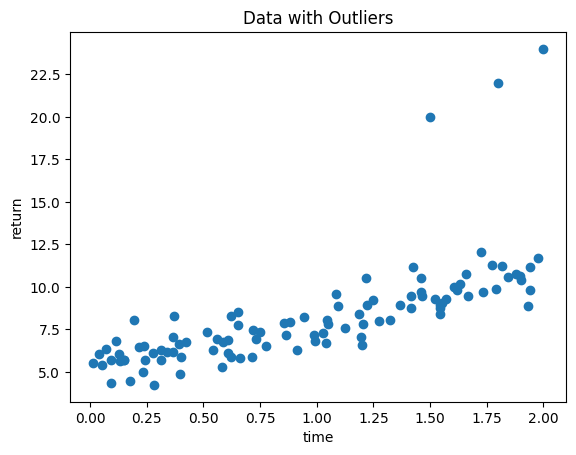

In [ ]:
# Plot the data with outliers
plt.scatter(data['time'], data['return'])
plt.title("Data with Outliers")
plt.xlabel("time")
plt.ylabel("return")
plt.show()

Linear Regression

In [ ]:
# Add a constant term for the intercept
time_const = sm.add_constant(data['time'])

In [ ]:
# Fit the OLS model
model = sm.OLS(data['return'], time_const).fit()

In [ ]:
# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 return   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           7.98e-17
Time:                        18:55:57   Log-Likelihood:                -224.64
No. Observations:                 103   AIC:                             453.3
Df Residuals:                     101   BIC:                             458.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8019      0.403     11.907      0.0

Cooks Distance

In [ ]:
# Calculate Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]


In [ ]:
# Print Cook's distance
print("Cook's Distance for each observation:")
print(cooks_d)

Cook's Distance for each observation:
[2.10265175e-05 5.13772667e-03 5.02717094e-04 7.36474281e-03
 9.02126203e-05 3.42863895e-04 8.54980072e-03 4.75958271e-03
 2.01253423e-03 2.00097448e-03 4.43119672e-03 1.24786973e-03
 4.06970624e-03 4.37250087e-04 1.84159366e-05 1.98619055e-03
 1.02287535e-03 5.51314293e-04 4.96608056e-04 3.78474457e-03
 4.45895153e-05 2.30181732e-04 2.24372783e-05 2.41324683e-04
 3.17376907e-03 2.62520519e-03 2.73602155e-04 1.48344505e-03
 4.68227853e-04 1.03681468e-03 2.46474212e-03 7.47140824e-05
 4.72292424e-04 3.30867182e-03 3.12848668e-02 1.25711979e-03
 9.52146870e-06 1.87790329e-02 8.88833774e-04 8.22750346e-08
 1.97583502e-06 2.45656543e-03 6.04311466e-03 1.37011498e-05
 8.14807095e-04 3.04655640e-03 2.20970366e-03 3.41865057e-03
 3.39767567e-05 1.01665814e-02 1.42134185e-02 3.19433175e-03
 2.06699824e-03 5.38397560e-03 4.96576404e-03 2.01086860e-03
 2.75701238e-03 4.21729842e-04 2.04690958e-03 2.59605842e-03
 1.20577506e-03 2.90047195e-04 1.92775306e-05 2

In [ ]:
threshold = 4 / len(data)

In [ ]:
influential_points = np.where(cooks_d > threshold)[0]

In [ ]:
print("Influential points (indices):", influential_points)

Influential points (indices): [100 101 102]


<ipython-input-30-f7d7e44c8034>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(len(data)), cooks_d, markerfmt=",", use_line_collection=True)


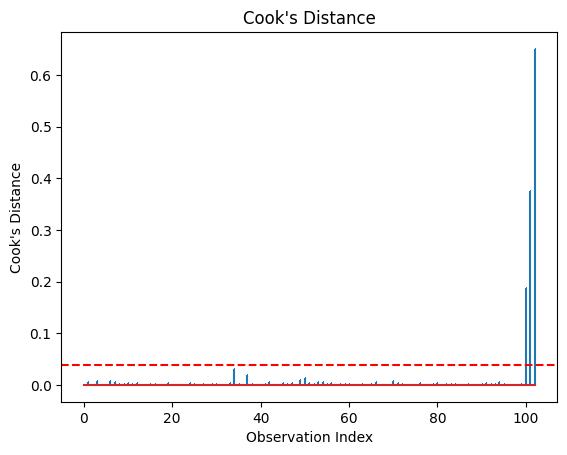

In [ ]:
# Plot Cook's distance
plt.stem(np.arange(len(data)), cooks_d, markerfmt=",", use_line_collection=True)
plt.axhline(y=threshold, color='r', linestyle='--')
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

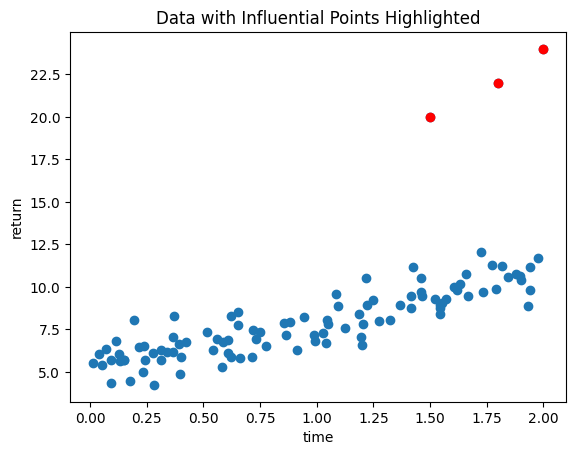

In [ ]:
# Highlight influential points in the original data plot
plt.scatter(data['time'], data['return'])
plt.scatter(data['time'].iloc[influential_points], data['return'].iloc[influential_points], color='red')
plt.title("Data with Influential Points Highlighted")
plt.xlabel("time")
plt.ylabel("return")
plt.show()

In [ ]:
## spliting data set for doing ML and finding accuracy

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['time']], data['return'], test_size=0.2, random_state=42)

In [ ]:
## ORDINARY LEAST SQUARE REGRESSION

In [ ]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)



In [ ]:
## LASSO REGRESSION

In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [ ]:
## Huber regression

In [ ]:
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
y_pred_huber = huber_model.predict(X_test)

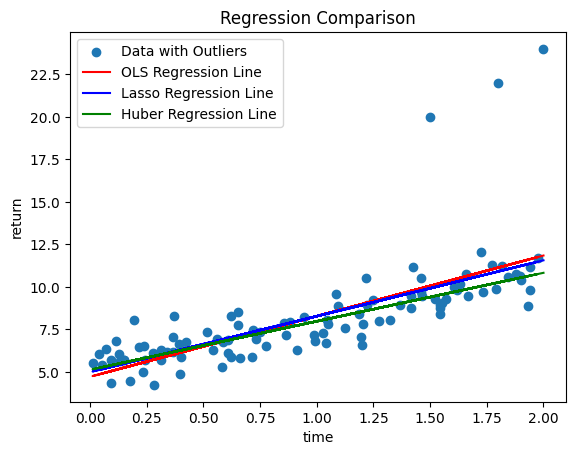

In [ ]:
plt.scatter(data['time'], data['return'], label='Data with Outliers')
plt.plot(data['time'], ols_model.predict(data[['time']]), color='red', label='OLS Regression Line')
plt.plot(data['time'], lasso_model.predict(data[['time']]), color='blue', label='Lasso Regression Line')
plt.plot(data['time'], huber_model.predict(data[['time']]), color='green', label='Huber Regression Line')
plt.title("Regression Comparison")
plt.xlabel("time")
plt.ylabel("return")
plt.legend()
plt.show()

In [ ]:
def print_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse}, R²: {r2}")

In [ ]:
print_metrics("OLS Regression", y_test, y_pred_ols)
print_metrics("Lasso Regression", y_test, y_pred_lasso)
print_metrics("Huber Regression", y_test, y_pred_huber)

OLS Regression - Mean Squared Error: 5.4896765130253815, R²: 0.451055184158498
Lasso Regression - Mean Squared Error: 5.506485944133217, R²: 0.4493743109700693
Huber Regression - Mean Squared Error: 5.9060599288025495, R²: 0.4094185746149447


In [ ]:
print(f"OLS Intercept: {ols_model.intercept_}, Coefficient: {ols_model.coef_[0]}")
print(f"Lasso Intercept: {lasso_model.intercept_}, Coefficient: {lasso_model.coef_[0]}")
print(f"Huber Intercept: {huber_model.intercept_}, Coefficient: {huber_model.coef_[0]}")

OLS Intercept: 4.718960362091861, Coefficient: 3.564718227261091
Lasso Intercept: 4.993051661911569, Coefficient: 3.2868760965298582
Huber Intercept: 5.131205844280147, Coefficient: 2.850288201020918


In [ ]:
## Increasing Outlier

In [ ]:
outlier_time = 2 * np.random.rand(5, 1)
outlier_return = 20 + 10 * np.random.randn(5, 1)

In [ ]:
time_outliers = np.vstack([time, outlier_time])
return_outliers = np.vstack([returns, outlier_return])

In [ ]:
data = pd.DataFrame(np.hstack([time_outliers, return_outliers]), columns=['time', 'return'])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 105 and the array at index 1 has size 103

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['time']], data['return'], test_size=0.2, random_state=42)

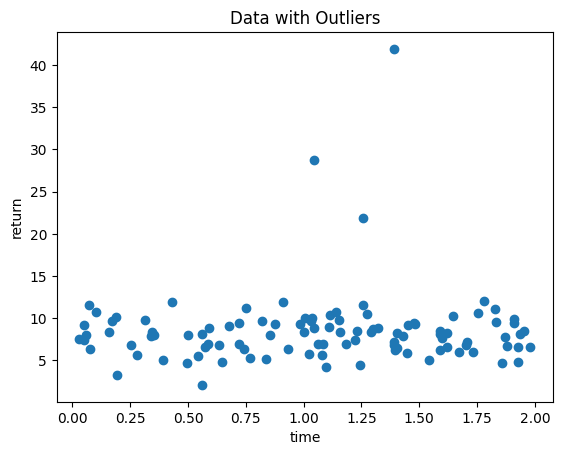

In [ ]:
plt.scatter(data['time'], data['return'])
plt.title("Data with Outliers")
plt.xlabel("time")
plt.ylabel("return")
plt.show()

In [ ]:
# Ordinary Least Squares (OLS) Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred_ols = ols_model.predict(X_test)

In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)


In [ ]:
# Huber Regression (Robust to outliers)
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
y_pred_huber = huber_model.predict(X_test)

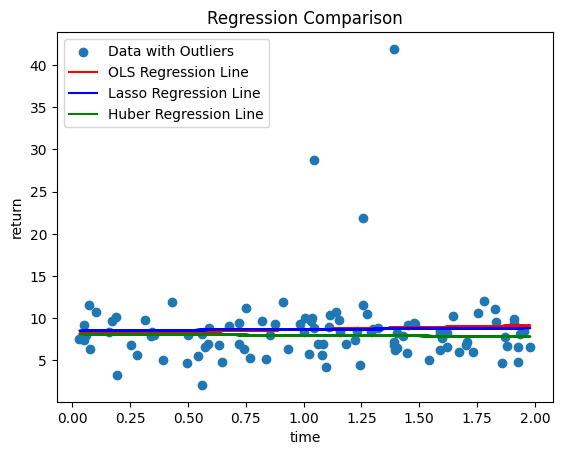

In [ ]:
# Plot the results
plt.scatter(data['time'], data['return'], label='Data with Outliers')
plt.plot(data['time'], ols_model.predict(data[['time']]), color='red', label='OLS Regression Line')
plt.plot(data['time'], lasso_model.predict(data[['time']]), color='blue', label='Lasso Regression Line')
plt.plot(data['time'], huber_model.predict(data[['time']]), color='green', label='Huber Regression Line')
plt.title("Regression Comparison")
plt.xlabel("time")
plt.ylabel("return")
plt.legend()
plt.show()

In [ ]:
# Calculate and print accuracy metrics
def print_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - Mean Squared Error: {mse:.2f}, R²: {r2:.2f}")

In [ ]:
print_metrics("OLS Regression", y_test, y_pred_ols)
print_metrics("Lasso Regression", y_test, y_pred_lasso)
print_metrics("Huber Regression", y_test, y_pred_huber)


OLS Regression - Mean Squared Error: 3.67, R²: -0.10
Lasso Regression - Mean Squared Error: 3.68, R²: -0.10
Huber Regression - Mean Squared Error: 3.43, R²: -0.03


Huber regression [robust to outlier]

In [ ]:
from sklearn.linear_model import LinearRegression, HuberRegressor

In [ ]:
ols_model = LinearRegression()
ols_model.fit(data[['time']], data['return'])
return_pred_ols = ols_model.predict(data[['time']])

In [ ]:
huber_model = HuberRegressor()
huber_model.fit(data[['time']], data['return'])
return_pred_huber = huber_model.predict(data[['time']])

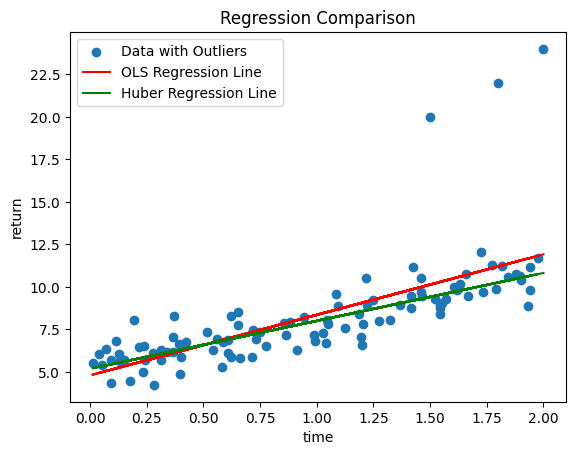

In [ ]:
plt.scatter(data['time'], data['return'], label='Data with Outliers')
plt.plot(data['time'], return_pred_ols, color='red', label='OLS Regression Line')
plt.plot(data['time'], return_pred_huber, color='green', label='Huber Regression Line')
plt.title("Regression Comparison")
plt.xlabel("time")
plt.ylabel("return")
plt.legend()
plt.show()

In [ ]:
print(f"OLS Intercept: {ols_model.intercept_}, Coefficient: {ols_model.coef_[0]}")
print(f"Huber Intercept: {huber_model.intercept_}, Coefficient: {huber_model.coef_[0]}")

OLS Intercept: 4.801874225958844, Coefficient: 3.557691429032496
Huber Intercept: 5.187683939634898, Coefficient: 2.818418142750206


Decesion Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['time']], data['return'], test_size=0.2, random_state=42)

In [ ]:
tree_regressor = DecisionTreeRegressor(random_state=0)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
tree_predictions = tree_regressor.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)

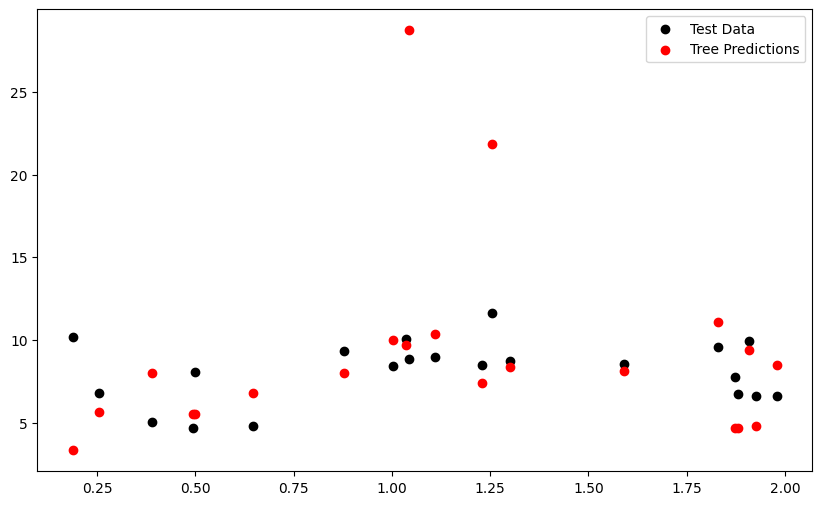

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Test Data')
plt.scatter(X_test, tree_predictions, color='red', label='Tree Predictions')
plt.legend()
plt.show()

In [ ]:
tree_predictions = tree_regressor.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)

In [ ]:
print(f'Decision Tree Regression MSE: {tree_mse:.3f}')

Decision Tree Regression MSE: 28.533
